In [1]:
import pandas as pd
import numpy as np

missing_values = ["n/a", "na", "--", "nan"]
data = pd.read_csv("./train.csv", na_values = missing_values)
data.drop(data.index[[5244810]],inplace=True)
#print(data.head())

/Users/markshaio/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Getting to know what kind of data we have

In [2]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

#Get number of missing values for each feature
print(data.isnull().sum().to_string())

#See if there are any missing values
print(data.isnull().values.any())

#Get total missing values
print(data.isnull().sum().sum())

# print(data["AVProductsEnabled"].isnull().sum())
# data["AVProductsEnabled"].fillna(2.0,inplace=True)
# print(data["AVProductsEnabled"][:100].to_string())

#Fill missing values
#data["AVProductsEnabled"].fillna(10,inplace=True)

MachineIdentifier                                          0
ProductName                                                0
EngineVersion                                              0
AppVersion                                                 0
AvSigVersion                                               0
IsBeta                                                     0
RtpStateBitfield                                       32318
IsSxsPassiveMode                                           0
DefaultBrowsersIdentifier                            8488044
AVProductStatesIdentifier                              36221
AVProductsInstalled                                    36221
AVProductsEnabled                                      36221
HasTpm                                                     0
CountryIdentifier                                          0
CityIdentifier                                        325409
OrganizationIdentifier                               2751518
GeoNameIdentifier       

In [21]:
data["IsProtected"].unique()
#ProductName: OK array(['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep'], dtype=object)
###AVProductStatesIdentifier : NO
###AVProductsEnabled: OK array([ 1.,  2.,  0.,  4., nan,  3.,  5.])
#HasTpm : OK array([1, 0])
#Platform: OK array(['windows10', 'windows7', 'windows8', 'windows2016'], dtype=object)
#Processor: OK array(['x64', 'arm64', 'x86'], dtype=object)
#OsVer: OK
#OsBuild: OK
#IsProtected: NO array([ 1.,  0., nan])
#PuaMode: NO array([nan, 'on', 'audit'], dtype=object) Potentially Unwanted Application Protection

"""
Potentially unwanted applications (PUA) are not considered viruses, malware, or other types of threats, 
but they might perform actions on endpoints which adversely affect endpoint performance or use.
PUA can also refer to an application that has a poor reputation, as assessed by Microsoft Defender ATP,
due to certain kinds of undesirable behavior.
"""

#SMode: NO array([ 0., nan,  1.])
#Firewall: NO array([ 1.,  0., nan])
###Census_OSArchitecture: OK array(['amd64', 'arm64', 'x86'], dtype=object) Possible duplicate to Processor
#Census_IsSecureBootEnabled: OK array([0, 1])
#Census_IsVirtualDevice: NO array([ 0., nan,  1.])
#Census_IsTouchEnabled: OK array([0, 1])

#Wdft_IsGamer: NO
#Wdft_RegionIdentifier: NO

#HasDetection: OK

'\nPotentially unwanted applications (PUA) are not considered viruses, malware, or other types of threats, \nbut they might perform actions on endpoints which adversely affect endpoint performance or use.\nPUA can also refer to an application that has a poor reputation, as assessed by Microsoft Defender ATP,\ndue to certain kinds of undesirable behavior.\n'

In [22]:
data["ProductName"][:5]
data["Processor"].value_counts()

x64      8105434
x86       815702
arm64        346
Name: Processor, dtype: int64

In [23]:
data["Census_OSArchitecture"].value_counts()

amd64    8105884
x86       815252
arm64        346
Name: Census_OSArchitecture, dtype: int64

In [24]:
#print(data["ProductName"].isnull().sum())
# data["IsProtected"].fillna(2.,inplace=True)
# print(data["IsProtected"].isnull().sum())
data["Firewall"].unique()
data["Firewall"].fillna(2., inplace=True)
data["Firewall"].value_counts()

data["PuaMode"].fillna("unknown", inplace=True)
puamode_one_hot = pd.get_dummies(data["PuaMode"],prefix="PuaMode")
puamode_one_hot[:3]
#data["Firewall"][:3]
data["PuaMode"].value_counts()
# df = pd.DataFrame({'ProductName': ['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']})

unknown    8919173
on            2307
audit            2
Name: PuaMode, dtype: int64

# CLEAN DATA

In [25]:
"""
Might not be useful to train with PuaMode as a feature since data[PuaMode].value_counts returns
unknown    8919174
on            2307
audit            2
Name: PuaMode, dtype: int64
"""
#Cateogrical one hot encoding
product_name_one_hot = pd.get_dummies(data["ProductName"],prefix='ProductName')
platform_one_hot = pd.get_dummies(data["Platform"],prefix="Platform")
processor_one_hot = pd.get_dummies(data["Processor"],prefix="Processor")

#Data filling
data["IsProtected"].fillna(2.,inplace=True)
data["Census_IsVirtualDevice"].fillna(2., inplace=True)
data["SMode"].fillna(2., inplace=True)
data["Firewall"].fillna(2., inplace=True)

#Data fill then one hot encoding for PuaMode
data["PuaMode"].fillna("unknown", inplace=True)
puamode_one_hot = pd.get_dummies(data["PuaMode"],prefix="PuaMode")

#Concatenate all dataframes
one_hot = [product_name_one_hot,platform_one_hot,processor_one_hot,data]
nn_data = pd.concat(one_hot, axis=1)
# nn_data.drop(nn_data.index[[5244810]],inplace=True)

In [26]:
input_columns = ["ProductName_fep","ProductName_mse","ProductName_mseprerelease","ProductName_scep","ProductName_win8defender","ProductName_windowsintune","ProductName_windowsintune","Platform_windows10","Platform_windows2016","Platform_windows7","Platform_windows8","Platform_windows2016","Processor_x64","Processor_arm64","Processor_x86","HasTpm","IsProtected","SMode","Firewall","Census_IsSecureBootEnabled","Census_IsVirtualDevice","Census_IsTouchEnabled","HasDetections"]
nn_input = nn_data[input_columns[:-1]]
nn_class = nn_data[input_columns[-1]]
nn_input.head(20)

,ProductName_fep,ProductName_mse,ProductName_mseprerelease,ProductName_scep,ProductName_win8defender,ProductName_windowsintune,ProductName_windowsintune,Platform_windows10,Platform_windows2016,Platform_windows7,...,Processor_x64,Processor_arm64,Processor_x86,HasTpm,IsProtected,SMode,Firewall,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
2,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
4,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
5,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
6,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,1,0.0,0
7,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
8,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
9,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1.0,0.0,1.0,1,0.0,0


# Neural Network Setup - Pytorch

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class DQN(nn.Module):

    def __init__(self, first_layer_size):
        super().__init__()
        second_layer_size = round(first_layer_size)
        third_layer_size = round(second_layer_size)
        self.fc1 = nn.Linear(in_features=first_layer_size, out_features=second_layer_size)
        self.fc2 = nn.Linear(in_features=second_layer_size, out_features=third_layer_size)
        self.out = nn.Linear(in_features=third_layer_size, out_features=1)

    def forward(self, t):
#         t = t.flatten(start_dim=1)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = torch.sigmoid(self.out(t))
        return t

#Instantiate the training neural network
train_nn = DQN(len(nn_input.columns))
lr = 0.01

# NN Training

In [49]:
def stochastic(instance_count,train_nn):
    """
    Stochastic Learning
    
    Args:
    instance_count (int): The number of training instances
    train_nn (DQN): The training neural network
    """
    m = nn.Sigmoid()
    optimiser = optim.Adam(params=train_nn.parameters(), lr=lr)
    for i in range(instance_count):
        loss = nn.BCELoss()
        prediction = train_nn(torch.tensor(nn_input.values[i],dtype=torch.float32,requires_grad=True))
        target = torch.tensor(nn_class[i],dtype=torch.float32)
        loss_output = loss(prediction,target)
        optimiser.zero_grad()
        loss_output.backward()
        optimiser.step()
        print(loss_output)
        if loss_output <= 0.1:
            break
    print("Loss is {}".format(loss_output))

stochastic(100,train_nn)
# print(torch.tensor(nn_input.values[4],dtype=torch.float32))
# print(train_nn(torch.tensor(nn_input.values[10],dtype=torch.float32)))

/Users/markshaio/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


tensor(0.5996, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5947, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5836, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8314, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8344, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8313, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8181, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5826, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5861, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8046, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5918, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8001, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5981, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5947, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8024, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.7979, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5958, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5993, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5997, grad_fn=<BinaryCrossEntropyBack

In [186]:
nn_class[:11]
torch.tensor(nn_class[0],dtype=torch.float32)

tensor(0.)

In [47]:
print(torch.tensor(nn_input.values[2],dtype=torch.float32))
print(torch.tensor(nn_input.values[3],dtype=torch.float32))
print(torch.tensor(nn_input.values[4],dtype=torch.float32))
print(train_nn(torch.tensor(nn_input.values[10],dtype=torch.float32)))

tensor([0.9856, 0.1730, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
        1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000])
tensor([0.9856, 0.1970, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
        1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000])
tensor([0.9856, 0.1779, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
        1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000])
tensor([0.4511], grad_fn=<SigmoidBackward>)


# Analyse AvSigVersion Feature

In [27]:
#Lets have a look at what the data looks like
import seaborn as sns
data["AvSigVersion"][:3]

0    1.273.1735.0
1      1.263.48.0
2    1.273.1341.0
Name: AvSigVersion, dtype: object

In [28]:
"""
From above appears that the antivirus signiture vesision has 4 parts. Lets see which section of the version is worth
using as a feature. Lets create 4 separate feature, each to represent part of the version number.
"""
AvSigVersion_0 = data["AvSigVersion"].str.split(".", expand=True)[0]
AvSigVersion_1 = data["AvSigVersion"].str.split(".", expand=True)[1]
AvSigVersion_2 = data["AvSigVersion"].str.split(".", expand=True)[2]
AvSigVersion_3 = data["AvSigVersion"].str.split(".", expand=True)[3]

#sns.distplot(data["AvSigVersion"].str.split(".", expand=True)[2].astype(int))

1    8921414
0         68
Name: 0, dtype: int64

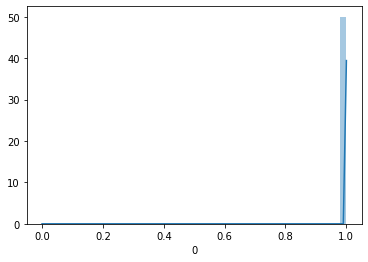

In [29]:
"""
For the data given how is the first part of the anti virus software version distributed??
"""
sns.distplot(AvSigVersion_0)
AvSigVersion_0.value_counts()

275    3901028
273    3724333
271     269369
269     214502
263     160659
267     138899
251      94182
277      79719
237      70628
261      48790
265      47509
259      36396
257      24257
253      15612
249      14581
247       9753
245       9488
233       9339
235       8826
239       7188
225       5590
255       5029
243       4964
241       4962
231       4692
229       4271
227       3896
223       1862
221        764
199         86
207         73
0           68
213         36
217         19
219         19
215         15
203         13
155         10
197          9
195          8
205          7
193          6
209          6
169          5
201          4
167          3
211          3
177          1
187          1
189          1
Name: 1, dtype: int64

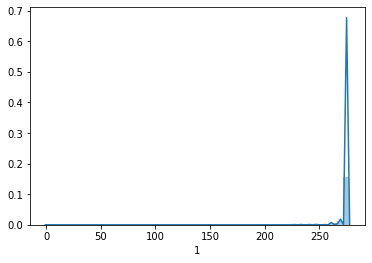

In [30]:
"""
For the data given how is the second part of the anti virus software version distributed??
"""
#Finds out where the bad data is, which returns [5244810]
AvSigVersion_1.index[AvSigVersion_1 == "2&#x17;3"].tolist()
#Drops the bad data
AvSigVersion_1.drop(AvSigVersion_1.index[[5244810]],inplace=True)
AvSigVersion_1.index[AvSigVersion_1 == "2&#x17;3"].tolist()
sns.distplot(AvSigVersion_1)
AvSigVersion_1.value_counts()

48      105206
1420    102993
1140    102399
727      92620
1244     92054
         ...  
5826         1
2614         1
2226         1
5318         1
2088         1
Name: 2, Length: 2766, dtype: int64

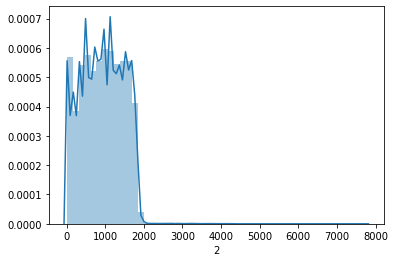

In [31]:
sns.distplot(AvSigVersion_2)
AvSigVersion_2.value_counts()

/Users/markshaio/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


0    8921482
Name: 3, dtype: int64

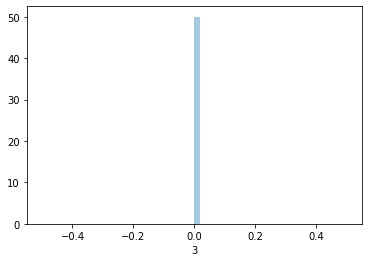

In [32]:
"""
Since the last part of the anti virus version is 0 for all of the dataset, this will not be a good feature for our
analysis.
"""
sns.distplot(AvSigVersion_3)
AvSigVersion_3.value_counts()

In [33]:
"""
Let's look at the data distribution between part 1 and 2 of the antivirus version number 
"""
AvSigVersion_1_2 = pd.concat([AvSigVersion_1, AvSigVersion_2], axis=1)
AvSigVersion_1_2
AvSigVersion_1_2.fillna("0", inplace=True)
# sns.jointplot(x=1, y=2, data=AvSigVersion_1_2, kind="kde")

# sns.pairplot(AvSigVersion_1_2)

In [40]:
"""
Rename the new feature columns from 1 and 2 to Av_Version_1, Av_Version_2
"""
AvSigVersion_1_2.rename(columns={1: 'Av_Version_1', 2: 'Av_Version_2'}, inplace=True)
AvSigVersion_1_2

,Av_Version_1,Av_Version_2
0,273,1735
1,263,48
2,273,1341
3,273,1527
4,273,1379
...,...,...
8921478,273,1555
8921479,233,4218
8921480,275,1242
8921481,269,1834


In [44]:
"""
Lets categorical embed AV versions part 1 and 2
"""
def AV_embed(dataframe):
    """
    Categorical embed the AVSigVersion by giving more weight to newer versions. Eg: Suppose version 220 is the most
    current category then a version of 170 will result in 170/220 = 0.773, where as version 220 now becomes 1. The
    idea behind this embedding is to transform the data to "how close is the version to the latest version of the AV?"
    
    Args:
        dataframe (dataframe): The AVSigVersion_1_2 dataframe
    
    Returns:
        dataframe (dataframe): The normalised, ie. between 0-1, AVSigVersion_1_2 dataframe
    """
    dataframe.astype("int64").iloc[:,1].max()
    
    column_1 = dataframe.astype("int64").iloc[:,0] #All data from first column
    col1_min, col1_max = column_1.min(), column_1.max()
    column_2 = dataframe.astype("int64").iloc[:,1] #All data from second column
    col2_min, col2_max = column_2.min(), column_2.max()

    print(dataframe["Av_Version_1"].dtypes)
    print(type(col1_max))
    
    dataframe["Av_Version_1"] = dataframe["Av_Version_1"].astype("int64")/float(col1_max)
    dataframe["Av_Version_2"] = dataframe["Av_Version_2"].astype("int64")/float(col2_max)
    print(dataframe)
    print(dataframe["Av_Version_1"].max(),dataframe["Av_Version_2"].max())
    return dataframe

AV_embedded = AV_embed(AvSigVersion_1_2)
#Concatenate all dataframes
nn_dataframe = [AV_embedded,nn_input]
nn_input = pd.concat(nn_dataframe, axis=1)
# nn_data.drop(nn_data.index[[5244810]],inplace=True)

object
<class 'numpy.int64'>
         Av_Version_1  Av_Version_2
0            0.985560      0.223842
1            0.949458      0.006193
2            0.985560      0.173010
3            0.985560      0.197007
4            0.985560      0.177913
...               ...           ...
8921478      0.985560      0.200619
8921479      0.841155      0.544188
8921480      0.992780      0.160237
8921481      0.971119      0.236615
8921482      0.992780      0.155980

[8921482 rows x 2 columns]
1.0 1.0


In [45]:
nn_input

,Av_Version_1,Av_Version_2,ProductName_fep,ProductName_mse,ProductName_mseprerelease,ProductName_scep,ProductName_win8defender,ProductName_windowsintune,ProductName_windowsintune,Platform_windows10,...,Processor_x64,Processor_arm64,Processor_x86,HasTpm,IsProtected,SMode,Firewall,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled
0,0.985560,0.223842,0,0,0,0,1,0,0,1,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
1,0.949458,0.006193,0,0,0,0,1,0,0,1,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
2,0.985560,0.173010,0,0,0,0,1,0,0,1,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
3,0.985560,0.197007,0,0,0,0,1,0,0,1,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
4,0.985560,0.177913,0,0,0,0,1,0,0,1,...,1,0,0,1,1.0,0.0,1.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921478,0.985560,0.200619,0,0,0,0,1,0,0,1,...,1,0,0,1,1.0,0.0,1.0,1,0.0,0
8921479,0.841155,0.544188,0,0,0,0,1,0,0,1,...,0,0,1,1,0.0,2.0,1.0,0,0.0,0
8921480,0.992780,0.160237,0,0,0,0,1,0,0,1,...,1,0,0,1,1.0,0.0,1.0,1,0.0,0
8921481,0.971119,0.236615,0,0,0,0,1,0,0,1,...,1,0,0,1,1.0,0.0,1.0,1,0.0,0
